<a href="https://colab.research.google.com/github/Rooshy-yang/HomeWork/blob/master/simpleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import torch
import numpy
import pandas
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from google.colab import drive
import random
# drive.mount('./mount')


In [32]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()

    self.model = nn.Sequential(
        nn.Linear(4, 3),
        nn.Sigmoid(),
        nn.Linear(3, 1),
        nn.Sigmoid()
    )
    self.counter = 0
    self.progress=[]

    self.loss_function = nn.MSELoss()
    self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

  def forward(self, inputs):
    return self.model(inputs)

  def train(self, inputs, targets):
    outputs = self.forward(inputs)

    loss = self.loss_function(outputs, targets)

    self.counter += 1
    if(self.counter % 10 == 0):
      self.progress.append(loss.item())
    if(self.counter % 10000 == 0):
      print("counter = ", self.counter)

    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

  def plot_progress(self):
    df = pandas.DataFrame(self.progress, columns=['loss'])
    print(self.progress)
    df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
    pass

def generate_random(size):
  return torch.rand(size)

def generate_real():
  return torch.FloatTensor(
      [
       random.uniform(0.8,1.0),
       random.uniform(0,0.2),
       random.uniform(0.8,1.0),
       random.uniform(0.0,0.2)
      ]
  )
# generate_real()
# generate_random(4)
# D = Discriminator()

# for i in range(10000):
#   D.train(generate_real(), torch.FloatTensor([1]))
#   D.train(generate_random(4), torch.FloatTensor([0]))

# D.plot_progress()

In [33]:
class Generator(nn.Module):
  def __init__(self):
    super().__init__()

    self.model = nn.Sequential(
        nn.Linear(1, 3),
        nn.Sigmoid(),
        nn.Linear(3, 4),
        nn.Sigmoid()
    )
    self.counter = 0
    self.progress=[]

    # self.loss_function = nn.MSELoss()
    self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

  def forward(self, inputs):
    return self.model(inputs)

  def train(self, D, inputs, targets):
    # outputs = self.forward(inputs)
    g_output = self.forward(inputs)
    d_output = D.forward(g_output)

    loss = D.loss_function(d_output, targets)

    self.counter += 1
    if(self.counter % 10 == 0):
      self.progress.append(loss.item())
    if(self.counter % 10000 == 0):
      print("counter = ", self.counter)

    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

  def plot_progress(self):
    df = pandas.DataFrame(self.progress, columns=['loss'])
    print(self.progress)
    df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
    pass

def generate_random(size):
  return torch.rand(size)

def generate_real():
  return torch.FloatTensor(
      [
       random.uniform(0.8,1.0),
       random.uniform(0,0.2),
       random.uniform(0.8,1.0),
       random.uniform(0.0,0.2)
      ]
  )

# G = Generator()
# 
# for i in range(10000):
  # G.train(torch.FloatTensor([1]), generate_real())
  # G.train(torch.FloatTensor([0]), generate_random(4))

# G.plot_progress()


[0.37685207 0.54259855 0.44441298 0.21932735]
counter =  10000
counter =  20000
[0.82216233 0.14355086 0.79735255 0.13675071]
counter =  30000
counter =  40000
[0.94689465 0.04125148 0.9406514  0.06564417]
counter =  50000
counter =  60000
[0.95903695 0.036088   0.95637095 0.0594521 ]
counter =  70000
counter =  80000
[0.9622803  0.03694252 0.96078414 0.06076409]
counter =  90000
counter =  100000
[0.96250796 0.04128982 0.9617913  0.06709155]
counter =  110000
counter =  120000
[0.96018916 0.05648341 0.9605063  0.08720078]
counter =  130000
counter =  140000
[0.95210624 0.12923528 0.9543913  0.14493461]
counter =  150000
counter =  160000
[0.9432353  0.23471048 0.94757986 0.17762893]
counter =  170000
counter =  180000
[0.93988764 0.26729178 0.9450399  0.18238986]
counter =  190000
counter =  200000
counter =  10000
[0.19824016094207764, 0.19916687905788422, 0.2000950127840042, 0.2009907364845276, 0.2018616944551468, 0.2027253359556198, 0.2035776525735855, 0.2044076770544052, 0.2052069

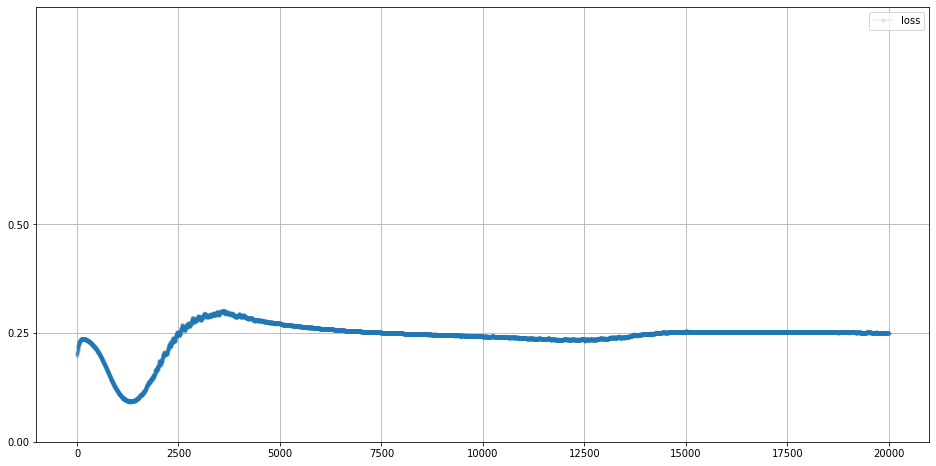

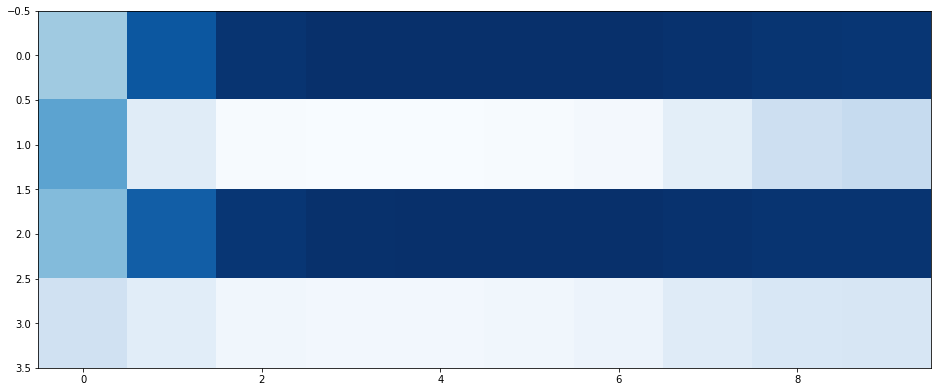

In [53]:
G = Generator()
D = Discriminator()
image_list = []
for i in range(10000):
  for j in range(10):
    D.train(generate_real(), torch.FloatTensor([1]))
    D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0]))
  for q in range(1):
    G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))
  if(i % 1000 == 0): 
    temp =  G.forward(torch.FloatTensor([0.5])).detach().numpy() 
    print(temp)
    image_list.append(temp)

D.plot_progress()
print(G.forward(torch.FloatTensor([0.5])).detach())
plt.figure(figsize=(16,8))
print(numpy.array(image_list))
print(numpy.array(image_list).T)
plt.imshow(numpy.array(image_list).T, interpolation='none', cmap='Blues')